Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from model_vision import BetaVAE

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "train_record/stage1new"
#model_path_name = "tf_models"
model_path_name = "train_beta_vae"
# NOTE: make sure you copy the vae model you want to test from tf_vae/vae.json to tf_models/vae.json

z_size=64

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0
obs.shape

In [44]:
data = np.load("train_bvae_metrics/result.npz", allow_pickle=True)
data['dict'].item()

{'b0.001_20.json': [0.83386886, 0.69789255, 4.482666e-05, 1.0, 0.69789255],
 'b0.001_21.json': [0.78273654, 0.71177685, 2.5140711e-05, 1.0, 0.71177685],
 'b0.001_22.json': [0.86353374, 0.6645455, 1.2607097e-05, 1.0, 0.6645455],
 'b0.001_23.json': [0.83455473, 0.6863223, 9.483744e-06, 1.0, 0.6863223],
 'b0.005_20.json': [0.9242169, 0.67214876, 1.5845366e-05, 1.0, 0.67214876],
 'b0.005_21.json': [0.9561467, 0.6744628, 9.276204e-06, 1.0, 0.6744628],
 'b0.005_22.json': [0.8766848, 0.6840909, 2.6239717e-05, 1.0, 0.6840909],
 'b0.005_23.json': [0.86550426, 0.69235533, 3.1121497e-05, 1.0, 0.69235533],
 'b0.05_20.json': [1.0169097, 0.65022135, 0.00022082056, 1.0, 0.65022135],
 'b0.05_21.json': [1.0855045, 0.65690035, 0.00024626323, 1.0, 0.65690035],
 'b0.05_22.json': [1.106209, 0.6330627, 0.00013432077, 1.0, 0.6330627],
 'b0.05_23.json': [1.0090917, 0.6447602, 0.00011482546, 1.0, 0.6447602],
 'b0.5_20.json': [1.4353203, 0.44630995, 0.0031714193, 1.0, 0.44630995],
 'b0.5_21.json': [1.413996, 0.

In [7]:
vae = BetaVAE(z_size=z_size,
              batch_size=1,
              is_training=True,
              reuse=tf.AUTO_REUSE,
              gpu_mode=False)

#vae.load_json(os.path.join(model_path_name, 'b1.0_20.json'))

INFO:tensorflow:Model using cpu.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use tf.cast instead.


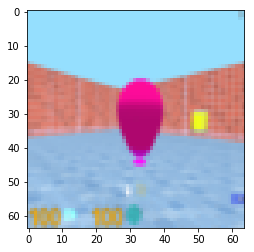

In [8]:
# show recorded frame that will be fed into the input of VAE
frame = random.choice(obs).reshape(1, 64, 64, 3)
plt.imshow(frame[0])
plt.show()



In [25]:
vae.load_json(os.path.join(model_path_name, 'b0.005_20.json'))
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)
z = np.copy(batch_z)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])
tt

[-2.0574  0.5944 -0.0858  1.9987 -1.4649  0.7551 -0.0557  0.0735 -0.2284  0.0337  0.3285 -1.6694
 -0.3253  1.2718  1.8832  0.5639 -0.8295  0.5065 -0.899   0.0898 -1.0997  0.5667  0.1035 -0.1603
 -0.2858  0.4473  1.486   0.9989  0.7645  0.2024 -0.189  -0.2004  0.8751 -0.1239 -0.528   0.529
  0.7968 -0.4825  1.3657  1.7574  1.8731 -1.2986  1.9805  0.1086 -2.2323  1.0561  1.2996  0.2233
 -0.4621  2.3638  0.1289 -2.2315 -1.9853  1.1107 -2.2287  1.7699  0.9076 -0.3273  0.477  -0.9065
 -0.1386 -0.1176  0.9133 -0.9173]


array([[ 0.    ,  0.0045, -2.0574],
       [ 1.    ,  0.0038,  0.5944],
       [ 2.    ,  0.0005, -0.0858],
       [ 3.    ,  0.    ,  1.9987],
       [ 4.    ,  0.    , -1.4649],
       [ 5.    ,  0.0061,  0.7551],
       [ 6.    ,  0.0002, -0.0557],
       [ 7.    ,  0.0027,  0.0735],
       [ 8.    ,  0.0026, -0.2284],
       [ 9.    ,  0.0001,  0.0337],
       [10.    ,  0.0034,  0.3285],
       [11.    ,  0.0029, -1.6694],
       [12.    ,  0.0064, -0.3253],
       [13.    ,  0.0019,  1.2718],
       [14.    ,  0.0012,  1.8832],
       [15.    ,  0.0018,  0.5639],
       [16.    ,  0.0024, -0.8295],
       [17.    ,  0.0039,  0.5065],
       [18.    ,  0.0003, -0.899 ],
       [19.    ,  0.0005,  0.0898],
       [20.    ,  0.007 , -1.0997],
       [21.    ,  0.0014,  0.5667],
       [22.    ,  0.0042,  0.1035],
       [23.    ,  0.0028, -0.1603],
       [24.    ,  0.005 , -0.2858],
       [25.    ,  0.0004,  0.4473],
       [26.    ,  0.0028,  1.486 ],
       [27.    ,  0.0022,  0

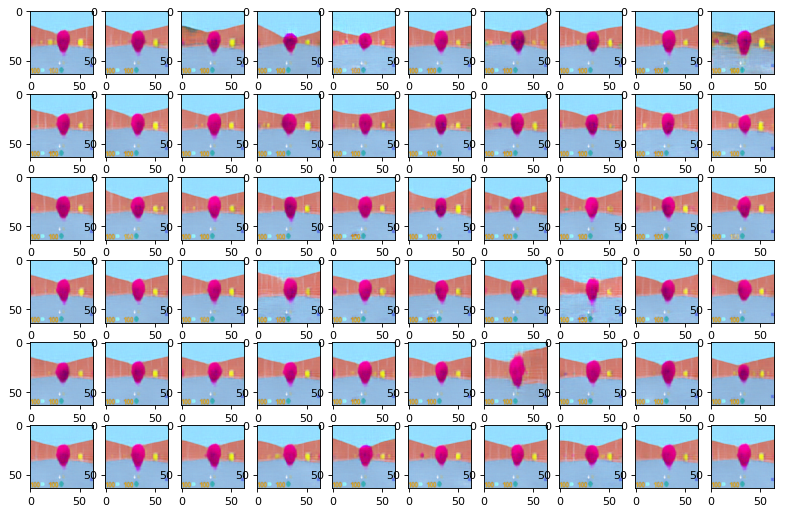

In [30]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
base = 0
vae.load_json(os.path.join(model_path_name, 'b0.005_20.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

y = 6; x = 10
fig, ax = plt.subplots(y,x, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(base, base + min([len(index), x * y])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] += i * 0.2
        ax[j//x, j%x].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

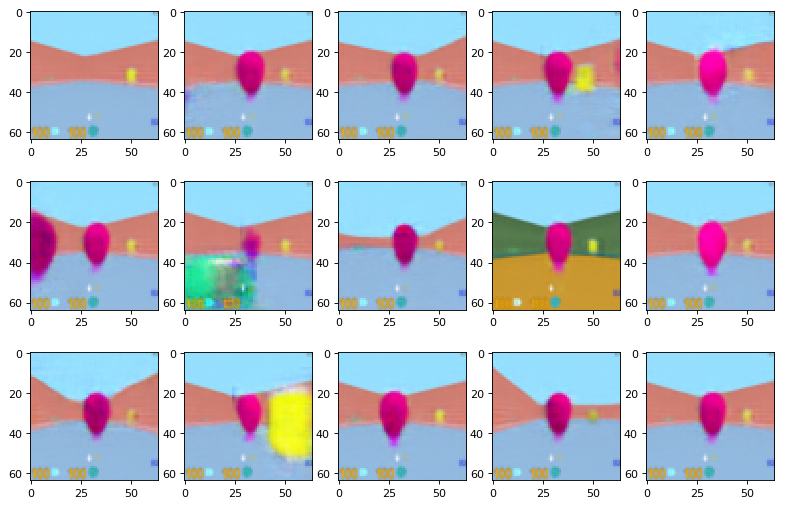

In [43]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join("train_beta_vae", 'b100.0_13.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] += i * 0.15
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

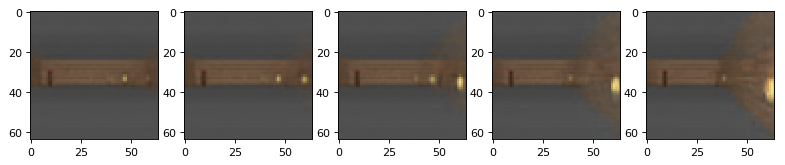

In [627]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'vae.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]


fig, ax = plt.subplots(1,5, figsize=(12,3), dpi=80)
for i in range(5):
    z = np.zeros_like(batch_z)
    z[0][index[5]] = -0 + 0.5 * i
    ax[i].imshow(vae.decode(z)[0])

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
plt.show()

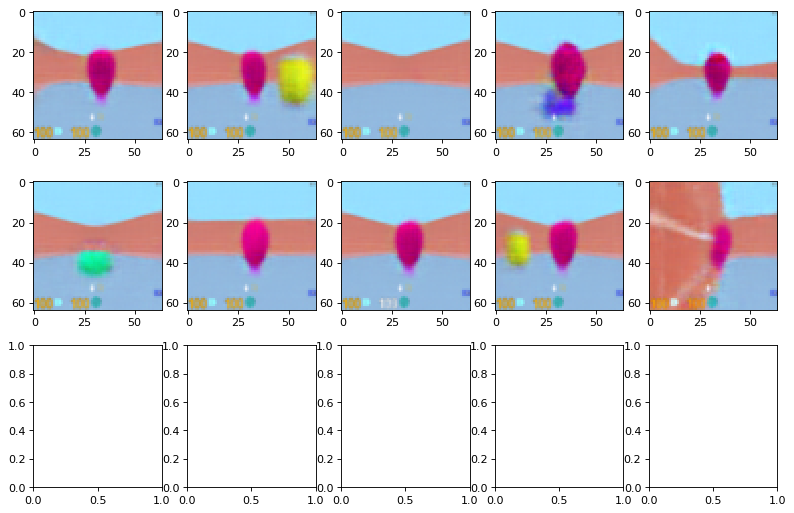

In [38]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b1.0_20.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] += i * 0.15
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

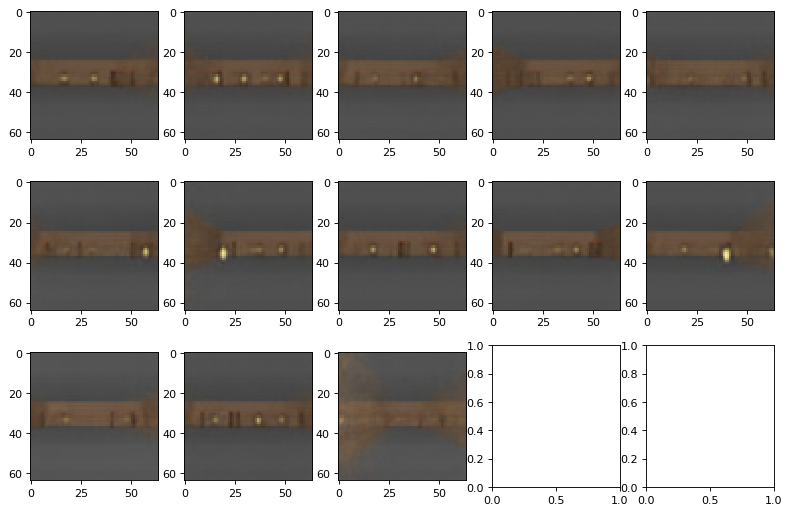

In [584]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b20.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

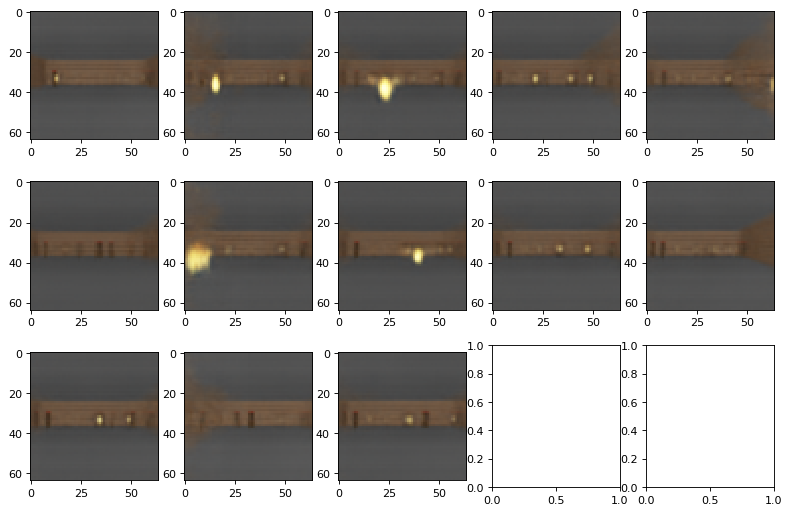

In [585]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b10.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())